In [32]:
import pandas as pd
from sklearn import datasets

data = datasets.load_wine()
feature_names = data.feature_names

df = pd.DataFrame(data.data, columns=feature_names)
df['target'] = data.target

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [33]:
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

scaler = MinMaxScaler()

for feature in feature_names:
    df[feature], fitted_lambda = stats.boxcox(df[feature])
    df[feature] = scaler.fit_transform(df[[feature]])
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,0.837043,0.476573,0.529183,0.290788,0.820472,0.671795,0.639577,0.418396,0.683511,0.619336,0.472591,0.965457,0.763918,0
1,0.561549,0.496735,0.373324,0.036838,0.571668,0.623288,0.581268,0.374126,0.375185,0.508758,0.480703,0.747527,0.756391,0
2,0.550962,0.632310,0.664374,0.451197,0.583809,0.671795,0.673832,0.460408,0.818548,0.622457,0.464469,0.654963,0.820217,0
3,0.874907,0.541748,0.568050,0.356001,0.709469,0.991308,0.720584,0.327289,0.653299,0.764282,0.324935,0.767970,0.935463,0
4,0.572145,0.674733,0.781094,0.573825,0.752793,0.671795,0.567426,0.627458,0.549477,0.502787,0.472591,0.561034,0.563465,0


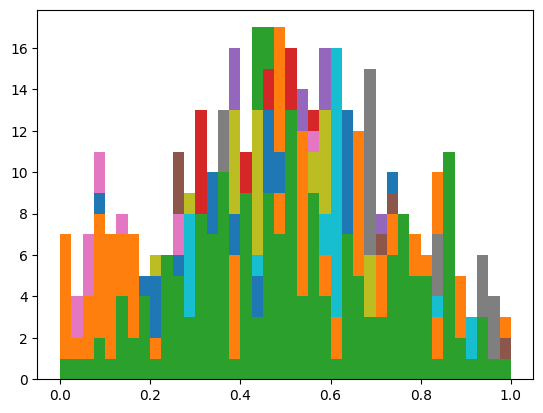

In [34]:
import matplotlib.pyplot as plt

for feature in feature_names:
    plt.hist(df[feature], bins=40)

In [35]:
df.to_csv("wine_normalized.csv", index=False)